# Лабораторная работа №3

## Импортируем библиотеки

In [2]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

from typing import Union
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import (LinearRegression, Lasso, Ridge, ElasticNet, Lars,
                                  BayesianRidge)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector


from scipy.stats import t

import statsmodels.api as sm

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## Загрузим таблицы

In [3]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

df_train.head()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0


In [4]:
df_train.describe(include="all")

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


In [5]:
df_test_id = df_test["id"]
df_train_id = df_train["id"]
df_test.drop("id", axis=1, inplace=True)
df_train.drop("id", axis=1, inplace=True)

res_col = "Цена"

In [6]:
# union_dict = {
#     "Тип ремонта": [
#         "Без.ремонта",
#         "Дизайнерский",
#         "Евроремонт",
#         "Косметический"
#     ],
#     "Тип балкона": [
#         "Балкон",
#         "Лоджия"
#     ],
#     "Тип санузла": [
#         "Совмещенный.санузел",
#         "Раздельный.санузел"
#     ],
#     "Тип перекрытий": [
#         "Железобетонные.перекрытия",
#         "Смешанные.перекрытия",
#         "Деревянные.перекрытия",
#         "Иные.перекрытия"
#     ],
#     "Тип стен": [
#         'Панельные.стены',
#         'Блочные.стены',
#         'Деревянные.стены',
#         'Кирпичные.стены',
#         'Монолитные.стены'
#     ]
# }
#
#
#
# le = LabelEncoder()
# scaler = MinMaxScaler()
#
# united = []
# for new_col, col_to_union in union_dict.items():
#     if all(df_train[col_to_union].sum(axis=1) == 1) and all(df_test[col_to_union].sum(axis=1) == 1):
#         dfs = [df_train, df_test]
#         united.append(new_col)
#         for df in dfs:
#             df[col_to_union[0]] = pd.concat([df[col] for col in col_to_union], axis=1).idxmax(axis=1)
#             df.rename(columns={col_to_union[0]: new_col}, inplace=True)
#             df.drop(col_to_union[1:], axis=1, inplace=True)
#
#
# for col in united:
#     df_train[col] = le.fit_transform(df_train[col])
#     df_test[col] = le.fit_transform(df_test[col])
#
#
# df_train[united] = scaler.fit_transform(df_train[united])
# df_test[united] = scaler.fit_transform(df_test[united])
#
# print("\n".join([f"Столбцы: {', '.join(union_dict[col])} объеденины в '{col}'" for col in united]))

## Выясним тип колонок и наличие пропусков

In [7]:
tmp = pd.concat([df_train.isnull().sum(), df_train.dtypes
                 ], axis=1)
tmp.columns = ["Null vals", "Data types"]
tmp

,Null vals,Data types
Количество.комнат,0,int64
Студия,0,int64
Общая.площадь,0,float64
Этаж,0,int64
Этажей.в.доме,0,int64
Парковка,0,int64
Без.ремонта,0,int64
Дизайнерский,0,int64
Евроремонт,0,int64
Косметический,0,int64


## Построим матрицу корреляции

<AxesSubplot: >

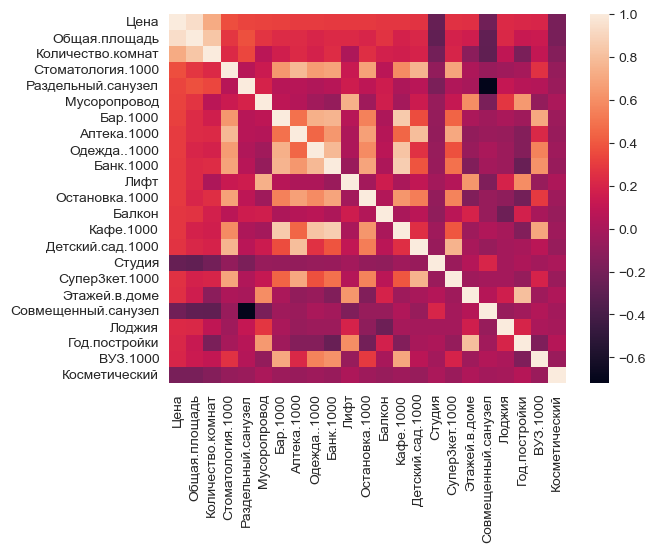

In [8]:
sorted_idx = df_train.corr()[res_col].abs().sort_values(ascending=False).index[:23]
corr_matrix = df_train[sorted_idx].corr()
sns.heatmap(corr_matrix)

## Уберем слабо коррелирующие признаки

<AxesSubplot: >

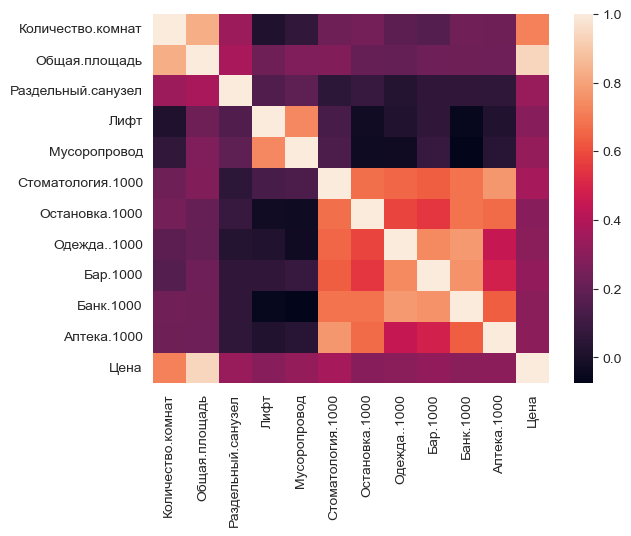

In [9]:
corr_matrix = df_train.corr()
threshold = 0.29
corr_price_matrix = df_train.corrwith(df_train[res_col]).abs()
weak_corr_features = set(corr_matrix[corr_price_matrix <= threshold].index)
df_train.drop(weak_corr_features, axis=1, inplace=True)
sns.heatmap(df_train.corr())

## Уберем сильно коррелирующие между собой признаки

<AxesSubplot: >

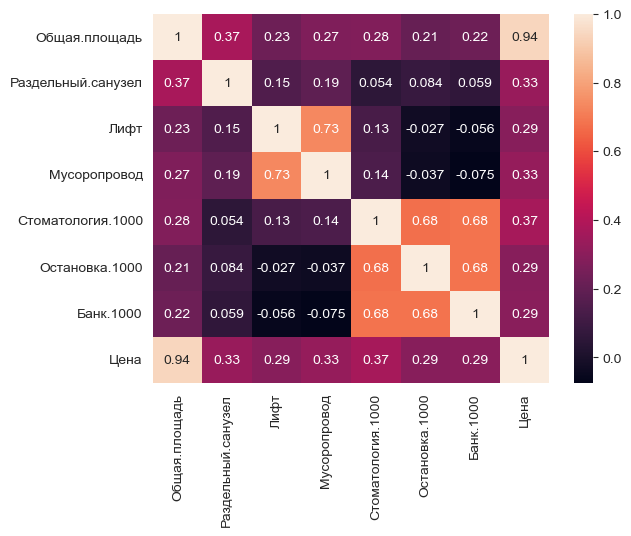

In [10]:
feature_select = df_train.drop(res_col, axis=1)
corr_series = feature_select.corr().abs().stack().sort_values()
corr_series = corr_series[~corr_series.duplicated()]
threshold = 0.75
drops = set([feature2 for (feature1, feature2), corr in corr_series.items() if
             corr > threshold and corr != 1])
df_train.drop(drops, axis=1, inplace=True)
sns.heatmap(df_train.corr(), annot=True)

In [11]:
# to_drop =  drops.intersection(weak_corr_features)
# df_train.drop(to_drop, axis=1, inplace=True)


## Построим модели

In [12]:
def sk_get_best(unfitted_model, params, x_train, y_train):
    grid = GridSearchCV(unfitted_model, params, cv=5,
                        scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)
    return grid.best_estimator_


def sm_get_best(unfitted_model, params, x, y) -> Union[sm.GLS, sm.WLS]:
    kfolder = KFold(n_splits=5, shuffle=True)
    param_keys = params.keys()
    fitted = []
    for param in product(*params.values()):
        param_dict = dict(zip(param_keys, param))
        for train_idx, test_idx in kfolder.split(x):
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            cur_model = unfitted_model(y_train, x_train, **param_dict)
            fitted_model = cur_model.fit()
            y_pred = fitted_model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            fitted.append({"model": fitted_model, "score": rmse})
    return min(fitted, key=lambda m_dict: m_dict["score"])["model"]


def get_criteria(fitted_model, x_test, y_test):
    y_pred = fitted_model.predict(x_test) if hasattr(fitted_model, "predict") else fitted_model.fit(x_test)[0]

    r_sq = r2_score(y_test, y_pred)

    n, m = x_test.shape
    adj_r_sq = 1 - (1 - r_sq) * (n - 1) / (n - m - 1)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    ll = -0.5 * (n * np.log(2 * np.pi) + n * np.log(
        np.sum(((y_test - y_pred) ** 2)) / n) + n)
    aic = 2 * m - 2 * ll
    bic = m * np.log(n) - 2 * ll

    res = pd.Series({
        "R^2": r_sq,
        "Adj R^2": adj_r_sq,
        "RMSE": rmse,
        "AIC": aic,
        "BIC": bic
    })
    return res


def get_stats_vals(fitted_model, x_test, y_test):
    n, p = x_test.shape

    mse = mean_squared_error(y_test, fitted_model.predict(x_test))
    std_errs = np.sqrt(np.diag(np.linalg.inv(np.dot(x_test.T, x_test))) * mse)
    coefs = fitted_model.coef_ if hasattr(fitted_model,
                                          "coef_") else fitted_model.params.values

    t_values = coefs / std_errs
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=n - p - 1))

    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = t.ppf(1 - alpha / 2, n - p - 1)
    conf_intervals = list(
        zip(coefs - t_critical * std_errs, coefs + t_critical * std_errs))
    is_hypothesis_rejected = np.abs(t_values) > t_critical

    return pd.DataFrame(
        {
            'Name': x_test.columns,
            'Estimate': coefs,
            'Standard Error': std_errs,
            't-value': t_values,
            'p-value': p_values,
            '95% Confidence Interval': conf_intervals,
            'Is hypothesis rejected': is_hypothesis_rejected
        })


def build_models(regressions_dict, x_train, x_test, y_train, y_test):
    all_stats = pd.DataFrame({
        "Model name": [],
        "R^2": [],
        "Adj R^2": [],
        "RMSE": [],
        "AIC": [],
        "BIC": []
    })

    def _sk_build(cur_model_name, cur_model_params):
        nonlocal all_stats
        model = cur_model_params["model"]
        if cur_model_params["selector"] == "SFS":
            selector = SequentialFeatureSelector(model)
            selector.fit(x_train, y_train)
            features = selector.get_support()
            x_train_sel, x_test_sel = x_train.loc[:, features], x_test.loc[:,
                                                                features]
        elif cur_model_params["selector"] == "Poly":
            selector = PolynomialFeatures(degree=2)
            x_train_sel, x_test_sel = selector.fit_transform(
                x_train), selector.fit_transform(x_test)
        else:
            x_train_sel, x_test_sel = x_train, x_test
        fitted_model = sk_get_best(model, cur_model_params["params"], x_train_sel,
                                   y_train)
        model_stats = get_criteria(fitted_model, x_test_sel, y_test)
        model_stats["Model name"] = cur_model_name
        all_stats = all_stats.append(model_stats, ignore_index=True)
        if cur_model_params["selector"] != "Poly":
            display(cur_model_name,
                    get_stats_vals(fitted_model, x_test_sel, y_test))

    def _sm_build(cur_model_name, cur_model_params):
        nonlocal all_stats
        fitted_model = sm_get_best(cur_model_params["model"],
                                   cur_model_params["params"], x_train, y_train)
        model_stats = get_criteria(fitted_model, x_test, y_test)
        model_stats["Model name"] = cur_model_name
        all_stats = all_stats.append(model_stats, ignore_index=True)
        display(cur_model_name,
                get_stats_vals(fitted_model, x_test, y_test))

    for model_name, model_params in regressions_dict.items():
        if model_params["kind"] == "sk":
            _sk_build(model_name, model_params)
        elif model_params["kind"] == "sm":
            _sm_build(model_name, model_params)

    return all_stats



In [13]:
x, y = df_train.drop(res_col, axis=1), df_train[res_col]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=7)
all_stats = pd.DataFrame({
    "Model name": [],
    "R^2": [],
    "Adj R^2": [],
    "RMSE": [],
    "AIC": [],
    "BIC": []
})

In [14]:
to_get_stats = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            'fit_intercept': [True, False],
            'positive': [True, False],
        },
        "selector": "SFS",
        "kind": "sk"
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'positive': [True, False],
            'warm_start': [True, False],
            "selection": ["cyclic", "random"]
        },
        "selector": None,
        "kind": "sk"
    },
    "Гребневая": {
        "model": Ridge(),
        "params": {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga',
                       'lbfgs']
        },
        "selector": None,
        "kind": "sk"
    },
    "Elastic-Net": {
        "model": ElasticNet(),
        "params": {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'l1_ratio': [0.2, 0.5, 0.8],
            'fit_intercept': [True, False],
        },
        "selector": None,
        "kind": "sk"
    },
    "Lars": {
        "model": Lars(),
        "params": {
            'n_nonzero_coefs': [100, 500, 1000],
            'fit_intercept': [True, False],
            'normalize': [True, False],
        },
        "selector": "SFS",
        "kind": "sk"
    },
    "BayesianRidge": {
        "model": BayesianRidge(),
        "params": {
            'n_iter': [100, 300, 500],
            'tol': [1e-3, 1e-4, 1e-5],
        },
        "selector": None,
        "kind": "sk"
    },
    "GLS": {
        "model": sm.GLS,
        "params": {
            'sigma': [0.1, 0.5, 1.0],
            'hasconst': [True, False],
            'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
            'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular',
                       'cosine'],
        },
        "kind": "sm"
    },
    "WLS": {
        "model": sm.WLS,
        "params": {
            'missing': ['none', 'drop', 'raise'],
            'hasconst': [True, False],
            'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
            'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular',
                       'cosine']
        },
        "kind": "sm"
    },
    "Polynomial": {
        "model": LinearRegression(),
        "params": {
            'fit_intercept': [True, False],
            'positive': [True, False],
        },
        "selector": "Poly",
        "kind": "sk"
    }
}

models_stats = build_models(to_get_stats, x_train, x_test, y_train, y_test)
all_stats = pd.concat([all_stats, models_stats], ignore_index=True)


'LinearRegression'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48680.041627,733.564584,66.360949,0.000000e+00,"(47234.96384700631, 50125.11940690575)",True
1,Лифт,145632.057068,39773.619076,3.661524,3.086612e-04,"(67280.43753486495, 223983.6766009967)",True
2,Стоматология.1000,18677.346820,3460.690936,5.396999,1.630551e-07,"(11859.995372433516, 25494.698267409978)",True


'Lasso'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48299.880880,910.771868,53.031810,0.000000,"(46505.56005800797, 50094.201701881764)",True
1,Раздельный.санузел,0.000000,44137.328452,0.000000,1.000000,"(-86955.39490493921, 86955.39490493921)",False
2,Лифт,96093.956588,65556.333559,1.465823,0.144033,"(-33059.23580266633, 225247.1489777341)",False
3,Мусоропровод,122146.367392,69973.375995,1.745612,0.082185,"(-15708.88474701358, 260001.6195301814)",False
4,Стоматология.1000,8600.540587,5378.082882,1.599183,0.111123,"(-1994.8746151176565, 19195.955789254134)",False
5,Остановка.1000,13666.318059,5467.419173,2.499592,0.013117,"(2894.9005314975075, 24437.73558635746)",True
6,Банк.1000,4263.905365,5521.963205,0.772172,0.440788,"(-6614.969908723646, 15142.780638228354)",False


'Гребневая'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48804.789144,908.269380,53.733826,0.000000,"(47015.39850015701, 50594.17978845023)",True
1,Раздельный.санузел,-43587.230497,44016.054222,-0.990258,0.323067,"(-130303.701820326, 43129.240827032816)",False
2,Лифт,98315.133433,65376.207254,1.503837,0.133966,"(-30483.190310733058, 227113.45717755944)",False
3,Мусоропровод,113709.400287,69781.113173,1.629515,0.104544,"(-23767.072931553368, 251185.87350641994)",False
4,Стоматология.1000,8364.804410,5363.305756,1.559636,0.120192,"(-2201.4982276114933, 18931.1070477086)",False
5,Остановка.1000,14066.238113,5452.396582,2.579827,0.010494,"(3324.416744264985, 24808.059482105127)",True
6,Банк.1000,3960.311673,5506.790745,0.719169,0.472751,"(-6888.672184928836, 14809.29553099217)",False


'Elastic-Net'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48870.635510,906.830840,53.891678,0.000000,"(47084.078948211354, 50657.192072138285)",True
1,Раздельный.санузел,-32898.721351,43946.340481,-0.748611,0.454840,"(-119477.84893348141, 53680.406230551715)",False
2,Лифт,90073.684833,65272.662763,1.379960,0.168910,"(-38520.64486631885, 218668.01453313886)",False
3,Мусоропровод,94229.435879,69670.592080,1.352499,0.177516,"(-43029.298622574104, 231488.17038108266)",False
4,Стоматология.1000,9160.035599,5354.811217,1.710618,0.088471,"(-1389.5318609738115, 19709.603059345754)",False
5,Остановка.1000,13489.801053,5443.760938,2.478030,0.013915,"(2764.992852544712, 24214.6092533681)",True
6,Банк.1000,3600.902577,5498.068951,0.654940,0.513147,"(-7230.898385348009, 14432.703540232422)",False


'Lars'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48680.041627,733.564584,66.360949,0.000000e+00,"(47234.96384700621, 50125.11940690566)",True
1,Лифт,145632.057068,39773.619076,3.661524,3.086612e-04,"(67280.43753486527, 223983.676600997)",True
2,Стоматология.1000,18677.346820,3460.690936,5.396999,1.630551e-07,"(11859.995372433728, 25494.698267410186)",True


'BayesianRidge'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48850.495695,907.076346,53.854889,0.000000,"(47063.45545916482, 50637.53593177462)",True
1,Раздельный.санузел,-35640.792996,43958.238071,-0.810788,0.418308,"(-122243.36013990332, 50961.77414725089)",False
2,Лифт,92437.005291,65290.334026,1.415784,0.158163,"(-36192.13874281972, 221066.14932561427)",False
3,Мусоропровод,99511.421665,69689.453995,1.427927,0.154641,"(-37784.472884584146, 236807.31621554226)",False
4,Стоматология.1000,8943.520455,5356.260925,1.669732,0.096304,"(-1608.903088767498, 19495.943998972216)",False
5,Остановка.1000,13646.790190,5445.234727,2.506190,0.012881,"(2919.0784632028317, 24374.50191727472)",True
6,Банк.1000,3699.933636,5499.557443,0.672769,0.501755,"(-7134.7998194860465, 14534.667091630034)",False


'GLS'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,48099.513347,913.178272,52.672643,0.000000,"(46300.45164426486, 49898.57505003901)",True
1,Раздельный.санузел,-28669.929536,44253.946293,-0.647850,0.517714,"(-115855.07442201197, 58515.21535039268)",False
2,Лифт,79916.351148,65729.543817,1.215836,0.225267,"(-49578.08451504406, 209410.78681065142)",False
3,Мусоропровод,111383.399621,70158.256782,1.587602,0.113721,"(-26836.08801612674, 249602.88725773236)",False
4,Стоматология.1000,9827.266754,5392.292633,1.822465,0.069655,"(-796.1432201390871, 20450.676727994498)",False
5,Остановка.1000,8395.586481,5481.864964,1.531520,0.126986,"(-2404.290844549274, 19195.463806335967)",False
6,Банк.1000,4442.159889,5536.553110,0.802333,0.423171,"(-6465.459102462903, 15349.778881421038)",False


'WLS'

,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Is hypothesis rejected
0,Общая.площадь,47506.325578,913.683708,51.994279,0.000000,"(45706.268111511265, 49306.38304400335)",True
1,Раздельный.санузел,-28727.827437,44278.440427,-0.648799,0.517102,"(-115961.22846314499, 58505.57358850476)",False
2,Лифт,91818.530642,65765.924488,1.396141,0.163989,"(-37747.57894592945, 221384.64023050017)",False
3,Мусоропровод,124922.932986,70197.088703,1.779603,0.076433,"(-13373.057809179125, 263218.9237802093)",False
4,Стоматология.1000,8146.127949,5395.277215,1.509863,0.132422,"(-2483.1619799149357, 18775.417878823726)",False
5,Остановка.1000,8450.616444,5484.899124,1.540706,0.124734,"(-2355.238510144387, 19256.4713973113)",False
6,Банк.1000,7459.054198,5539.617539,1.346493,0.179441,"(-3454.6020567000232, 18372.710451707833)",False


In [15]:
nonparam_model = sm.nonparametric.KernelReg(y_train, x_train, var_type="".join(
    ["c" if len(x_train[col].value_counts()) > 2 else "u" for col in
     x_train.columns]))
nonparam_stats = get_criteria(nonparam_model, x_test, y_test)
nonparam_stats["Model name"] = "NonParam"
all_stats = all_stats.append(nonparam_stats, ignore_index=True)

## Оценим модели

In [16]:
all_stats

,Model name,R^2,Adj R^2,RMSE,AIC,BIC
0,LinearRegression,0.892246,0.890894,323562.743684,6861.558214,6872.037398
1,Lasso,0.891603,0.888374,324527.023925,6871.004435,6895.455865
2,Гребневая,0.892198,0.888987,323635.335045,6869.667236,6894.118666
3,Elastic-Net,0.892539,0.889338,323122.753211,6868.896887,6893.348317
4,Lars,0.892246,0.890894,323562.743684,6861.558214,6872.037398
5,BayesianRidge,0.892481,0.889278,323210.232213,6869.028444,6893.479874
6,GLS,0.891029,0.887783,325384.475930,6872.286831,6896.738261
7,WLS,0.890909,0.887659,325564.573110,6872.555753,6897.007183
8,Polynomial,0.893172,0.874503,322170.029115,6925.461804,7051.212016
9,NonParam,0.900549,0.897586,310847.266602,6850.073813,6874.525243


In [18]:
series = all_stats[['Model name', 'R^2']].set_index('Model name')['R^2']
series.to_csv("scores3.csv")

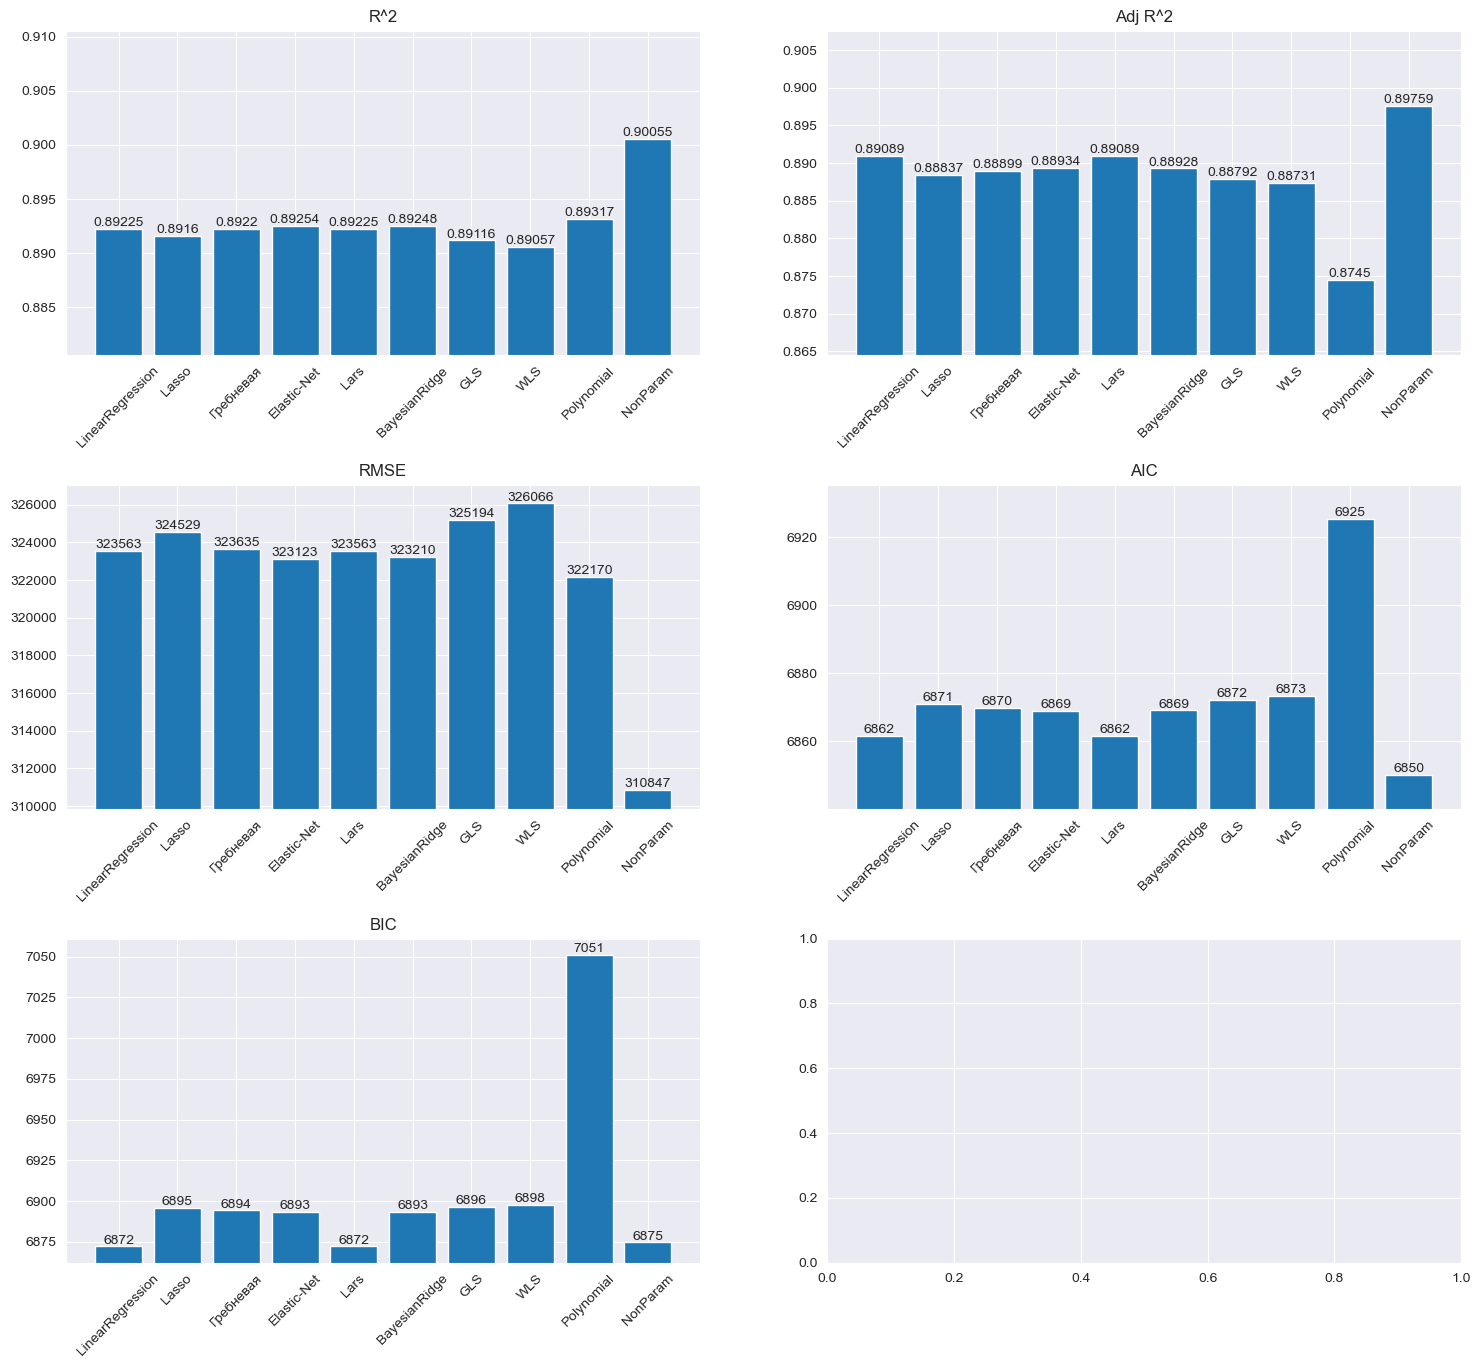

In [16]:
ylims = {
    "R^2": [min(all_stats["R^2"]) - 0.01, max(all_stats["R^2"]) + 0.01],
    "Adj R^2": [min(all_stats["Adj R^2"]) - 0.01, max(all_stats["Adj R^2"]) + 0.01],
    "RMSE": [min(all_stats["RMSE"]) - 1000, max(all_stats["RMSE"]) + 1000],
    "AIC": [min(all_stats["AIC"]) - 10, max(all_stats["AIC"]) + 10],
    "BIC": [min(all_stats["BIC"]) - 10, max(all_stats["BIC"]) + 10],
}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
fig.subplots_adjust(hspace=0.4)

for ax, comb in zip(axs.flatten(),
                    product(["Model name"], all_stats.columns.tolist()[1:])):
    model_names, cur_stat = comb
    to_plot = all_stats[list(comb)]
    title = cur_stat
    ax.set_ylim(ylims[title])
    ax.set_title(title)

    ax.bar(all_stats[model_names], all_stats[cur_stat])
    ax.set_xticklabels(list(to_plot[model_names]), rotation=45)

    for i, val in enumerate(to_plot[cur_stat]):
        ax.text(i, val, str(round(val, 5 if val < 1 else None)), ha='center',
                va='bottom')
